In [1]:
import time
import numpy as np
import sys
import _pickle as pic 

In [2]:
import centroid as f    # functions to determine centroid, angle, and slope.
import profile_scan as p    # functions to create a surface profile

In [16]:
 import importlib

 importlib.reload(p)
importlib.reload(f)

<module 'centroid' from 'C:\\Users\\Johnny Atler\\Desktop\\Surface Profile 6_14\\centroid.py'>

In [3]:
import instrumental                              # instrumental used to install camera drivers

from instrumental.drivers.cameras import uc480   # imports ThorLabs uc480 camera driver
cam = uc480.UC480_Camera() 
cam.set_defaults(exposure_time = '0.000001s')    # exposure time 1 microsecond to prevent saturation

In [4]:
import thorlabs_apt as apt                      # drivers for motorized linear stages
                                                # will cause a python crash if run with stages already initialized

In [5]:
apt.list_available_devices()                    # lists serial numbers of motorized linear stages
                                                # if null array returned, restart jupyter notebook from command prompt

[(31, 27002870), (31, 27002907)]

In [6]:
stage_x = apt.Motor(27002870)                 # initializes stages by serial number
stage_y = apt.Motor(27002907)

stage_x.enable()
stage_y.enable()

stage_x.move_home(True)                       # moves stages to 0.0000, takes ~10s each stage
stage_y.move_home(True)

In [30]:
stage_x.move_to(25)
stage_y.move_to(25)

In [11]:
stage_x.move_to(2.1)
stage_y.move_to(5)

In [13]:
stage_x.move_to(1.9)
stage_y.move_to(5)

In [31]:
data = cam.grab_image()
x0, y0 = np.unravel_index(np.argmax(data), data.shape)

dx, dy = f.slopes(cam.grab_image())

In [65]:
stage_x.move_to(0)
time.sleep(5)
stage_x.move_to(10)

In [14]:
test = np.array([[1,2,12],[4,1,10]])
print(test)

am = test.argmax()
c_idx = am % test.shape[1]
r_idx = am // test.shape[1]

print(c_idx)
print(r_idx)

max_x,max_y = np.unravel_index(np.argmax(test), test.shape)
print(max_x,max_y)

[[ 1  2 12]
 [ 4  1 10]]
2
0
0 2


In [52]:
#Surface Scanning Inputs

writefile = "scan_sample_v4.pic"                          # name of file where data is saved
xlim = [0,25]                                    # bounds of scan along x-axis
ylim = [0,25]                                    # bounds of scan along y-axis
nx, ny = [51,51]                                  # number of scan positions along each axis
num_samples = nx * ny                           # total number of scan positions
num_tests_per_sample = 1                        # number of tests per position
x, y = [np.linspace(xlim[0],xlim[1],nx), np.linspace(ylim[0],ylim[1],ny)]
dx2d_avg, dy2d_avg = [[[0. for i in range(nx)] for j in range(ny)] for k in range(2)]
dx2d_std, dy2d_std = [[[0. for i in range(nx)] for j in range(ny)] for k in range(2)]

In [63]:
dxs = [0.0008922864296787505, 0.0008923061011639217]
dx2d_avg[0][0] = np.mean(dxs)
print(dx2d_avg)

[[0.0008922962654213361, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [53]:
stage_x.move_to(x[0])
stage_y.move_to(y[0])

In [54]:
# No move to zero

for i in range(nx):
    stage_x.move_to(x[i])
    if i%2 == 0:                                # if even
        for j in range(ny):
            dxs, dys = [],[]
            stage_y.move_to(y[j])
            time.sleep(2)
            if i==0 and j==0: nsamp = 3*num_tests_per_sample
            else: nsamp = num_tests_per_sample
            for test in range(nsamp):
                dx, dy = f.slopes(cam.grab_image())
                dxs.append(dx); dys.append(dy)
                print("Scanned Sample at (%s,%s), Test %s/%s"%(x[i],y[j],test+1,nsamp))
            dx2d_avg[j][i] = np.mean(dxs)
            dy2d_avg[j][i] = np.mean(dys)
            dx2d_std[j][i] = np.std(dxs)
            dy2d_std[j][i] = np.std(dys)
            
    elif i%2 == 1:                              # if odd
        for j in list(reversed(range(ny))):
            stage_y.move_to(y[j])
            time.sleep(2)
            dxs, dys = [],[]
            if i==0 and j==0: nsamp = 5*num_tests_per_sample
            else: nsamp = num_tests_per_sample
            for test in range(nsamp):
                dx, dy = f.slopes(cam.grab_image())
                dxs.append(dx); dys.append(dy)
                print("Scanned Sample at (%s,%s), Test %s/%s"%(x[i],y[j],test+1,nsamp))
            dx2d_avg[j][i] = np.mean(dxs)
            dy2d_avg[j][i] = np.mean(dys)
            dx2d_std[j][i] = np.std(dxs)
            dy2d_std[j][i] = np.std(dys)

print("Scan Complete")

Scanned Sample at (0.0,0.0), Test 1/3
Scanned Sample at (0.0,0.0), Test 2/3
Scanned Sample at (0.0,0.0), Test 3/3
Scanned Sample at (0.0,0.5), Test 1/1
Scanned Sample at (0.0,1.0), Test 1/1
Scanned Sample at (0.0,1.5), Test 1/1
Scanned Sample at (0.0,2.0), Test 1/1
Scanned Sample at (0.0,2.5), Test 1/1
Scanned Sample at (0.0,3.0), Test 1/1
Scanned Sample at (0.0,3.5), Test 1/1
Scanned Sample at (0.0,4.0), Test 1/1
Scanned Sample at (0.0,4.5), Test 1/1
Scanned Sample at (0.0,5.0), Test 1/1
Scanned Sample at (0.0,5.5), Test 1/1
Scanned Sample at (0.0,6.0), Test 1/1
Scanned Sample at (0.0,6.5), Test 1/1
Scanned Sample at (0.0,7.0), Test 1/1
Scanned Sample at (0.0,7.5), Test 1/1
Scanned Sample at (0.0,8.0), Test 1/1
Scanned Sample at (0.0,8.5), Test 1/1
Scanned Sample at (0.0,9.0), Test 1/1
Scanned Sample at (0.0,9.5), Test 1/1
Scanned Sample at (0.0,10.0), Test 1/1
Scanned Sample at (0.0,10.5), Test 1/1
Scanned Sample at (0.0,11.0), Test 1/1
Scanned Sample at (0.0,11.5), Test 1/1
Scanned 

Scanned Sample at (2.0,3.5), Test 1/1
Scanned Sample at (2.0,4.0), Test 1/1
Scanned Sample at (2.0,4.5), Test 1/1
Scanned Sample at (2.0,5.0), Test 1/1
Scanned Sample at (2.0,5.5), Test 1/1
Scanned Sample at (2.0,6.0), Test 1/1
Scanned Sample at (2.0,6.5), Test 1/1
Scanned Sample at (2.0,7.0), Test 1/1
Scanned Sample at (2.0,7.5), Test 1/1
Scanned Sample at (2.0,8.0), Test 1/1
Scanned Sample at (2.0,8.5), Test 1/1
Scanned Sample at (2.0,9.0), Test 1/1
Scanned Sample at (2.0,9.5), Test 1/1
Scanned Sample at (2.0,10.0), Test 1/1
Scanned Sample at (2.0,10.5), Test 1/1
Scanned Sample at (2.0,11.0), Test 1/1
Scanned Sample at (2.0,11.5), Test 1/1
Scanned Sample at (2.0,12.0), Test 1/1
Scanned Sample at (2.0,12.5), Test 1/1
Scanned Sample at (2.0,13.0), Test 1/1
Scanned Sample at (2.0,13.5), Test 1/1
Scanned Sample at (2.0,14.0), Test 1/1
Scanned Sample at (2.0,14.5), Test 1/1
Scanned Sample at (2.0,15.0), Test 1/1
Scanned Sample at (2.0,15.5), Test 1/1
Scanned Sample at (2.0,16.0), Test 1/1

Scanned Sample at (4.0,8.0), Test 1/1
Scanned Sample at (4.0,8.5), Test 1/1
Scanned Sample at (4.0,9.0), Test 1/1
Scanned Sample at (4.0,9.5), Test 1/1
Scanned Sample at (4.0,10.0), Test 1/1
Scanned Sample at (4.0,10.5), Test 1/1
Scanned Sample at (4.0,11.0), Test 1/1
Scanned Sample at (4.0,11.5), Test 1/1
Scanned Sample at (4.0,12.0), Test 1/1
Scanned Sample at (4.0,12.5), Test 1/1
Scanned Sample at (4.0,13.0), Test 1/1
Scanned Sample at (4.0,13.5), Test 1/1
Scanned Sample at (4.0,14.0), Test 1/1
Scanned Sample at (4.0,14.5), Test 1/1
Scanned Sample at (4.0,15.0), Test 1/1
Scanned Sample at (4.0,15.5), Test 1/1
Scanned Sample at (4.0,16.0), Test 1/1
Scanned Sample at (4.0,16.5), Test 1/1
Scanned Sample at (4.0,17.0), Test 1/1
Scanned Sample at (4.0,17.5), Test 1/1
Scanned Sample at (4.0,18.0), Test 1/1
Scanned Sample at (4.0,18.5), Test 1/1
Scanned Sample at (4.0,19.0), Test 1/1
Scanned Sample at (4.0,19.5), Test 1/1
Scanned Sample at (4.0,20.0), Test 1/1
Scanned Sample at (4.0,20.5),

Scanned Sample at (6.0,12.5), Test 1/1
Scanned Sample at (6.0,13.0), Test 1/1
Scanned Sample at (6.0,13.5), Test 1/1
Scanned Sample at (6.0,14.0), Test 1/1
Scanned Sample at (6.0,14.5), Test 1/1
Scanned Sample at (6.0,15.0), Test 1/1
Scanned Sample at (6.0,15.5), Test 1/1
Scanned Sample at (6.0,16.0), Test 1/1
Scanned Sample at (6.0,16.5), Test 1/1
Scanned Sample at (6.0,17.0), Test 1/1
Scanned Sample at (6.0,17.5), Test 1/1
Scanned Sample at (6.0,18.0), Test 1/1
Scanned Sample at (6.0,18.5), Test 1/1
Scanned Sample at (6.0,19.0), Test 1/1
Scanned Sample at (6.0,19.5), Test 1/1
Scanned Sample at (6.0,20.0), Test 1/1
Scanned Sample at (6.0,20.5), Test 1/1
Scanned Sample at (6.0,21.0), Test 1/1
Scanned Sample at (6.0,21.5), Test 1/1
Scanned Sample at (6.0,22.0), Test 1/1
Scanned Sample at (6.0,22.5), Test 1/1
Scanned Sample at (6.0,23.0), Test 1/1
Scanned Sample at (6.0,23.5), Test 1/1
Scanned Sample at (6.0,24.0), Test 1/1
Scanned Sample at (6.0,24.5), Test 1/1
Scanned Sample at (6.0,25

Scanned Sample at (8.0,17.0), Test 1/1
Scanned Sample at (8.0,17.5), Test 1/1
Scanned Sample at (8.0,18.0), Test 1/1
Scanned Sample at (8.0,18.5), Test 1/1
Scanned Sample at (8.0,19.0), Test 1/1
Scanned Sample at (8.0,19.5), Test 1/1
Scanned Sample at (8.0,20.0), Test 1/1
Scanned Sample at (8.0,20.5), Test 1/1
Scanned Sample at (8.0,21.0), Test 1/1
Scanned Sample at (8.0,21.5), Test 1/1
Scanned Sample at (8.0,22.0), Test 1/1
Scanned Sample at (8.0,22.5), Test 1/1
Scanned Sample at (8.0,23.0), Test 1/1
Scanned Sample at (8.0,23.5), Test 1/1
Scanned Sample at (8.0,24.0), Test 1/1
Scanned Sample at (8.0,24.5), Test 1/1
Scanned Sample at (8.0,25.0), Test 1/1
Scanned Sample at (8.5,25.0), Test 1/1
Scanned Sample at (8.5,24.5), Test 1/1
Scanned Sample at (8.5,24.0), Test 1/1
Scanned Sample at (8.5,23.5), Test 1/1
Scanned Sample at (8.5,23.0), Test 1/1
Scanned Sample at (8.5,22.5), Test 1/1
Scanned Sample at (8.5,22.0), Test 1/1
Scanned Sample at (8.5,21.5), Test 1/1
Scanned Sample at (8.5,21

Scanned Sample at (10.0,21.0), Test 1/1
Scanned Sample at (10.0,21.5), Test 1/1
Scanned Sample at (10.0,22.0), Test 1/1
Scanned Sample at (10.0,22.5), Test 1/1
Scanned Sample at (10.0,23.0), Test 1/1
Scanned Sample at (10.0,23.5), Test 1/1
Scanned Sample at (10.0,24.0), Test 1/1
Scanned Sample at (10.0,24.5), Test 1/1
Scanned Sample at (10.0,25.0), Test 1/1
Scanned Sample at (10.5,25.0), Test 1/1
Scanned Sample at (10.5,24.5), Test 1/1
Scanned Sample at (10.5,24.0), Test 1/1
Scanned Sample at (10.5,23.5), Test 1/1
Scanned Sample at (10.5,23.0), Test 1/1
Scanned Sample at (10.5,22.5), Test 1/1
Scanned Sample at (10.5,22.0), Test 1/1
Scanned Sample at (10.5,21.5), Test 1/1
Scanned Sample at (10.5,21.0), Test 1/1
Scanned Sample at (10.5,20.5), Test 1/1
Scanned Sample at (10.5,20.0), Test 1/1
Scanned Sample at (10.5,19.5), Test 1/1
Scanned Sample at (10.5,19.0), Test 1/1
Scanned Sample at (10.5,18.5), Test 1/1
Scanned Sample at (10.5,18.0), Test 1/1
Scanned Sample at (10.5,17.5), Test 1/1


Scanned Sample at (12.0,22.5), Test 1/1
Scanned Sample at (12.0,23.0), Test 1/1
Scanned Sample at (12.0,23.5), Test 1/1
Scanned Sample at (12.0,24.0), Test 1/1
Scanned Sample at (12.0,24.5), Test 1/1
Scanned Sample at (12.0,25.0), Test 1/1
Scanned Sample at (12.5,25.0), Test 1/1
Scanned Sample at (12.5,24.5), Test 1/1
Scanned Sample at (12.5,24.0), Test 1/1
Scanned Sample at (12.5,23.5), Test 1/1
Scanned Sample at (12.5,23.0), Test 1/1
Scanned Sample at (12.5,22.5), Test 1/1
Scanned Sample at (12.5,22.0), Test 1/1
Scanned Sample at (12.5,21.5), Test 1/1
Scanned Sample at (12.5,21.0), Test 1/1
Scanned Sample at (12.5,20.5), Test 1/1
Scanned Sample at (12.5,20.0), Test 1/1
Scanned Sample at (12.5,19.5), Test 1/1
Scanned Sample at (12.5,19.0), Test 1/1
Scanned Sample at (12.5,18.5), Test 1/1
Scanned Sample at (12.5,18.0), Test 1/1
Scanned Sample at (12.5,17.5), Test 1/1
Scanned Sample at (12.5,17.0), Test 1/1
Scanned Sample at (12.5,16.5), Test 1/1
Scanned Sample at (12.5,16.0), Test 1/1


Scanned Sample at (14.0,24.0), Test 1/1
Scanned Sample at (14.0,24.5), Test 1/1
Scanned Sample at (14.0,25.0), Test 1/1
Scanned Sample at (14.5,25.0), Test 1/1
Scanned Sample at (14.5,24.5), Test 1/1
Scanned Sample at (14.5,24.0), Test 1/1
Scanned Sample at (14.5,23.5), Test 1/1
Scanned Sample at (14.5,23.0), Test 1/1
Scanned Sample at (14.5,22.5), Test 1/1
Scanned Sample at (14.5,22.0), Test 1/1
Scanned Sample at (14.5,21.5), Test 1/1
Scanned Sample at (14.5,21.0), Test 1/1
Scanned Sample at (14.5,20.5), Test 1/1
Scanned Sample at (14.5,20.0), Test 1/1
Scanned Sample at (14.5,19.5), Test 1/1
Scanned Sample at (14.5,19.0), Test 1/1
Scanned Sample at (14.5,18.5), Test 1/1
Scanned Sample at (14.5,18.0), Test 1/1
Scanned Sample at (14.5,17.5), Test 1/1
Scanned Sample at (14.5,17.0), Test 1/1
Scanned Sample at (14.5,16.5), Test 1/1
Scanned Sample at (14.5,16.0), Test 1/1
Scanned Sample at (14.5,15.5), Test 1/1
Scanned Sample at (14.5,15.0), Test 1/1
Scanned Sample at (14.5,14.5), Test 1/1


Scanned Sample at (16.5,25.0), Test 1/1
Scanned Sample at (16.5,24.5), Test 1/1
Scanned Sample at (16.5,24.0), Test 1/1
Scanned Sample at (16.5,23.5), Test 1/1
Scanned Sample at (16.5,23.0), Test 1/1
Scanned Sample at (16.5,22.5), Test 1/1
Scanned Sample at (16.5,22.0), Test 1/1
Scanned Sample at (16.5,21.5), Test 1/1
Scanned Sample at (16.5,21.0), Test 1/1
Scanned Sample at (16.5,20.5), Test 1/1
Scanned Sample at (16.5,20.0), Test 1/1
Scanned Sample at (16.5,19.5), Test 1/1
Scanned Sample at (16.5,19.0), Test 1/1
Scanned Sample at (16.5,18.5), Test 1/1
Scanned Sample at (16.5,18.0), Test 1/1
Scanned Sample at (16.5,17.5), Test 1/1
Scanned Sample at (16.5,17.0), Test 1/1
Scanned Sample at (16.5,16.5), Test 1/1
Scanned Sample at (16.5,16.0), Test 1/1
Scanned Sample at (16.5,15.5), Test 1/1
Scanned Sample at (16.5,15.0), Test 1/1
Scanned Sample at (16.5,14.5), Test 1/1
Scanned Sample at (16.5,14.0), Test 1/1
Scanned Sample at (16.5,13.5), Test 1/1
Scanned Sample at (16.5,13.0), Test 1/1


Scanned Sample at (18.5,23.5), Test 1/1
Scanned Sample at (18.5,23.0), Test 1/1
Scanned Sample at (18.5,22.5), Test 1/1
Scanned Sample at (18.5,22.0), Test 1/1
Scanned Sample at (18.5,21.5), Test 1/1
Scanned Sample at (18.5,21.0), Test 1/1
Scanned Sample at (18.5,20.5), Test 1/1
Scanned Sample at (18.5,20.0), Test 1/1
Scanned Sample at (18.5,19.5), Test 1/1
Scanned Sample at (18.5,19.0), Test 1/1
Scanned Sample at (18.5,18.5), Test 1/1
Scanned Sample at (18.5,18.0), Test 1/1
Scanned Sample at (18.5,17.5), Test 1/1
Scanned Sample at (18.5,17.0), Test 1/1
Scanned Sample at (18.5,16.5), Test 1/1
Scanned Sample at (18.5,16.0), Test 1/1
Scanned Sample at (18.5,15.5), Test 1/1
Scanned Sample at (18.5,15.0), Test 1/1
Scanned Sample at (18.5,14.5), Test 1/1
Scanned Sample at (18.5,14.0), Test 1/1
Scanned Sample at (18.5,13.5), Test 1/1
Scanned Sample at (18.5,13.0), Test 1/1
Scanned Sample at (18.5,12.5), Test 1/1
Scanned Sample at (18.5,12.0), Test 1/1
Scanned Sample at (18.5,11.5), Test 1/1


Scanned Sample at (20.5,22.0), Test 1/1
Scanned Sample at (20.5,21.5), Test 1/1
Scanned Sample at (20.5,21.0), Test 1/1
Scanned Sample at (20.5,20.5), Test 1/1
Scanned Sample at (20.5,20.0), Test 1/1
Scanned Sample at (20.5,19.5), Test 1/1
Scanned Sample at (20.5,19.0), Test 1/1
Scanned Sample at (20.5,18.5), Test 1/1
Scanned Sample at (20.5,18.0), Test 1/1
Scanned Sample at (20.5,17.5), Test 1/1
Scanned Sample at (20.5,17.0), Test 1/1
Scanned Sample at (20.5,16.5), Test 1/1
Scanned Sample at (20.5,16.0), Test 1/1
Scanned Sample at (20.5,15.5), Test 1/1
Scanned Sample at (20.5,15.0), Test 1/1
Scanned Sample at (20.5,14.5), Test 1/1
Scanned Sample at (20.5,14.0), Test 1/1
Scanned Sample at (20.5,13.5), Test 1/1
Scanned Sample at (20.5,13.0), Test 1/1
Scanned Sample at (20.5,12.5), Test 1/1
Scanned Sample at (20.5,12.0), Test 1/1
Scanned Sample at (20.5,11.5), Test 1/1
Scanned Sample at (20.5,11.0), Test 1/1
Scanned Sample at (20.5,10.5), Test 1/1
Scanned Sample at (20.5,10.0), Test 1/1


Scanned Sample at (22.5,20.5), Test 1/1
Scanned Sample at (22.5,20.0), Test 1/1
Scanned Sample at (22.5,19.5), Test 1/1
Scanned Sample at (22.5,19.0), Test 1/1
Scanned Sample at (22.5,18.5), Test 1/1
Scanned Sample at (22.5,18.0), Test 1/1
Scanned Sample at (22.5,17.5), Test 1/1
Scanned Sample at (22.5,17.0), Test 1/1
Scanned Sample at (22.5,16.5), Test 1/1
Scanned Sample at (22.5,16.0), Test 1/1
Scanned Sample at (22.5,15.5), Test 1/1
Scanned Sample at (22.5,15.0), Test 1/1
Scanned Sample at (22.5,14.5), Test 1/1
Scanned Sample at (22.5,14.0), Test 1/1
Scanned Sample at (22.5,13.5), Test 1/1
Scanned Sample at (22.5,13.0), Test 1/1
Scanned Sample at (22.5,12.5), Test 1/1
Scanned Sample at (22.5,12.0), Test 1/1
Scanned Sample at (22.5,11.5), Test 1/1
Scanned Sample at (22.5,11.0), Test 1/1
Scanned Sample at (22.5,10.5), Test 1/1
Scanned Sample at (22.5,10.0), Test 1/1
Scanned Sample at (22.5,9.5), Test 1/1
Scanned Sample at (22.5,9.0), Test 1/1
Scanned Sample at (22.5,8.5), Test 1/1
Sca

Scanned Sample at (24.5,19.0), Test 1/1
Scanned Sample at (24.5,18.5), Test 1/1
Scanned Sample at (24.5,18.0), Test 1/1
Scanned Sample at (24.5,17.5), Test 1/1
Scanned Sample at (24.5,17.0), Test 1/1
Scanned Sample at (24.5,16.5), Test 1/1
Scanned Sample at (24.5,16.0), Test 1/1
Scanned Sample at (24.5,15.5), Test 1/1
Scanned Sample at (24.5,15.0), Test 1/1
Scanned Sample at (24.5,14.5), Test 1/1
Scanned Sample at (24.5,14.0), Test 1/1
Scanned Sample at (24.5,13.5), Test 1/1
Scanned Sample at (24.5,13.0), Test 1/1
Scanned Sample at (24.5,12.5), Test 1/1
Scanned Sample at (24.5,12.0), Test 1/1
Scanned Sample at (24.5,11.5), Test 1/1
Scanned Sample at (24.5,11.0), Test 1/1
Scanned Sample at (24.5,10.5), Test 1/1
Scanned Sample at (24.5,10.0), Test 1/1
Scanned Sample at (24.5,9.5), Test 1/1
Scanned Sample at (24.5,9.0), Test 1/1
Scanned Sample at (24.5,8.5), Test 1/1
Scanned Sample at (24.5,8.0), Test 1/1
Scanned Sample at (24.5,7.5), Test 1/1
Scanned Sample at (24.5,7.0), Test 1/1
Scanne

In [47]:
print(y)
print(x)

[5.]
[1.9        1.92222222 1.94444444 1.96666667 1.98888889 2.01111111
 2.03333333 2.05555556 2.07777778 2.1       ]


3.0

In [55]:
print(x)
print(y)
print(dx2d_avg)
print(dy2d_avg)
print(dx2d_std)
print(dy2d_std)

scandict = {'x':np.array(x), 'y':np.array(y), 'dx2d_avg':np.array(dx2d_avg), 'dy2d_avg':np.array(dy2d_avg), 'dx2d_std':np.array(dx2d_std), 'dy2d_std':np.array(dy2d_std)}
with open(writefile,'wb') as scanfile: pic.dump(scandict,scanfile,protocol=2)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25. ]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25. ]
[[0.012954538911731742, 0.012685366443467374, 0.012904895862402437, 0.012500373946731907, 0.012670626032386311, 0.012366171951893304, 0.01259572207713116, 0.012253853345564017, 0.012413960128467154, 0.012216162368947816, 0.012359696728654309, 0.012112263800155808, 0.012252274762612644, 0.012018701096037808, 0.012161676263815835, 0.011908228871893061, 0.012078921544278523, 0.011830268204047428, 0.011966794596824249, 0.011752856517295277, 0.011925899809722931, 0.011593417181180

In [38]:
# Load scan data and profile the surface
with open("scan_sample_v2.pic",'rb') as scanfile: dict  = pic.load(scanfile)
x, y = dict['x'], dict['y']
dx2d_avg, dy2d_avg = dict['dx2d_avg'], dict['dy2d_avg']
dx2d_std, dy2d_std = dict['dx2d_std'], dict['dy2d_std']

#Reference slopes to initial slope at measurement (0,0)
#dx_ref,dy_ref = dx2d_avg[0][0], dy2d_avg[0][0]
#dx2d_avg = dx2d_avg - dx_ref
#dy2d_avg = dy2d_avg - dy_ref

#print(dx2d_avg)
#print(dy2d_avg)

surface_profile_v3 = p.profile2d(dx2d_avg,dy2d_avg,x,y)
print(surface_profile_v3)

[[0.         0.03559743 0.07016086 0.10392892 0.13692424 0.16988564
  0.20527196 0.24486404 0.28966413 0.33923693]
 [0.00671198 0.05016211 0.08897873 0.12713212 0.15848153 0.1851478
  0.21165013 0.24087962 0.27251583 0.30847946]
 [0.01878544 0.0708193  0.11457968 0.15639253 0.18375156 0.20364151
  0.21885597 0.23791548 0.25487345 0.2784699 ]
 [0.03475927 0.09124878 0.13750955 0.17745827 0.20486059 0.2223488
  0.22936942 0.2388612  0.24265233 0.25423636]
 [0.0501328  0.10662617 0.15321584 0.1922757  0.22167489 0.23985362
  0.24469608 0.24534009 0.23822318 0.23741207]
 [0.05990339 0.11533514 0.16399215 0.20139294 0.23392818 0.25254376
  0.25992557 0.25527329 0.2399756  0.22790561]
 [0.06359788 0.11836292 0.16889442 0.20627816 0.24097163 0.25996741
  0.27023524 0.26401901 0.2442337  0.22277245]
 [0.06203942 0.11662203 0.16921792 0.20598217 0.24276362 0.26125243
  0.27351116 0.26671344 0.24648592 0.21713957]
 [0.05585986 0.11029234 0.16478446 0.20170172 0.23998765 0.25755497
  0.27082753 0

In [19]:
# Load scan data and profile the surface
with open("scan_curved_1h_v1.pic",'rb') as scanfile: dict  = pic.load(scanfile)
x, y = dict['x'], dict['y']
dx2d_avg, dy2d_avg = dict['dx2d_avg'], dict['dy2d_avg']
dx2d_std, dy2d_std = dict['dx2d_std'], dict['dy2d_std']

#Reference slopes to initial slope at measurement (0,0)
#dx_ref,dy_ref = dx2d_avg[0][0], dy2d_avg[0][0]
#dx2d_avg = dx2d_avg - dx_ref
#dy2d_avg = dy2d_avg - dy_ref

#print(dx2d_avg)
#print(dy2d_avg)

surface_profile_v1 = p.profile2d(dx2d_avg,dy2d_avg,x,y)
print(surface_profile_v1)

FileNotFoundError: [Errno 2] No such file or directory: 'scan_curved_1h_v1.pic'

In [25]:
# Load scan data and profile the surface
with open("scan_sample_v1.pic",'rb') as scanfile: dict  = pic.load(scanfile)
x, y = dict['x'], dict['y']
dx2d_avg_1, dy2d_avg_1 = dict['dx2d_avg'], dict['dy2d_avg']
dx2d_std, dy2d_std = dict['dx2d_std'], dict['dy2d_std']

#Reference slopes to initial slope at measurement (0,0)
dx_ref_1,dy_ref_1 = dx2d_avg_1[0][0], dy2d_avg_1[0][0]
dx2d_avg_1 = dx2d_avg_1 - dx_ref_1
dy2d_avg_1 = dy2d_avg_1 - dy_ref_1

#dx2d_avg_1 = (dx2d_avg + dx2d_avg_1)/2
#dy2d_avg_1 = (dy2d_avg + dy2d_avg_1)/2


surface_profile_v3 = p.profile2d(dx2d_avg_1,dy2d_avg_1,x,y)
print(surface_profile_v3)

[[ 0.00000000e+00 -4.09957099e-03 -1.66831183e-02 -3.44479016e-02
  -4.79051806e-02]
 [-8.12629029e-05 -4.93372243e-03 -1.74319857e-02 -4.69539677e-02
  -7.72299428e-02]
 [-3.52433034e-03 -1.41870438e-02 -1.86719838e-02 -5.11267599e-02
  -9.30307125e-02]
 [-1.93559045e-02 -3.29816447e-02 -3.00979196e-02 -6.41806841e-02
  -1.04240470e-01]
 [-4.34986340e-02 -5.88459659e-02 -4.87183255e-02 -8.49299016e-02
  -1.18453336e-01]]


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [40]:
x_plt = np.zeros((len(y),len(x)))
y_plt = np.zeros((len(y),len(x)))

for i in range(len(y)):
    for j in range(len(x)):
        x_plt[i][j] = x[j]
        y_plt[i][j] = y[i]

print(x_plt)
print(y_plt)

#scandict = {'x_plt':np.array(x_plt), 'y_plt':np.array(y_plt), 'dx2d_avg':np.array(dx2d_avg), 'dy2d_avg':np.array(dy2d_avg), 'dx2d_std':np.array(dx2d_std), 'dy2d_std':np.array(dy2d_std)}
#with open(writefile,'wb') as scanfile: pic.dump(scandict,scanfile)

[[ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]
 [ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]
 [ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]
 [ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]
 [ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]
 [ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]
 [ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]
 [ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
  16.66666667 19.44444444 22.22222222 25.        ]


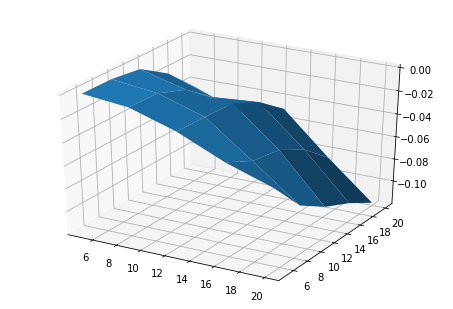

In [27]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x_plt, y_plt, surface_profile_v3)
plt.show()

In [ ]:
x_plt_1 = np.zeros((len(y),len(x)))
y_plt_1 = np.zeros((len(y),len(x)))

for i in range(len(y)):
    for j in range(len(x)):
        x_plt_1[i][j] = x[j]
        y_plt_1[i][j] = y[i]

print(x_plt_1)
print(y_plt_1)

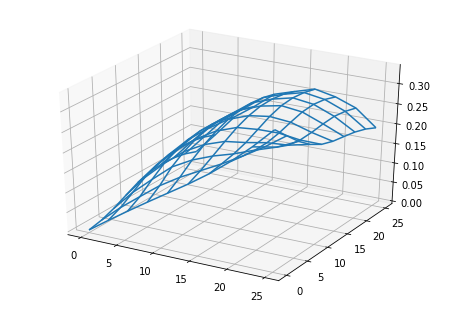

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x_plt, y_plt, surface_profile_v3)
plt.show()

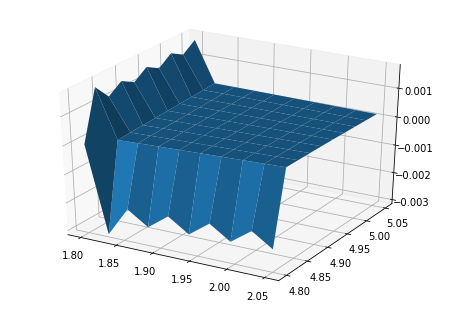

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x_plt, y_plt, surface_profile_v3)
plt.show()

In [33]:
surface_difference = surface_profile_v3-surface_profile_v2

Text(0.5,1,'Test Contour Plot')

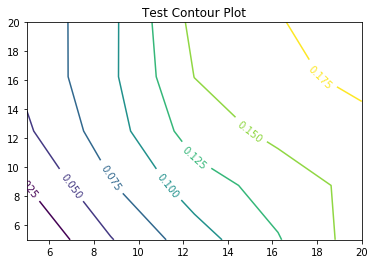

In [29]:
plt.figure()
CS = plt.contour(x_plt,y_plt,surface_profile_v2)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Test Contour Plot')

In [10]:
#Initial angle from slope measurements
angle = np.arctan(dx_mean[0][0])
angle = angle * 180/np.pi
print (angle)

11.142624236841101


In [11]:
#Initial angle from table dimensions
d = 2.235
w = 0.916
angle = 0.5*np.arctan(w/d)*180/np.pi
print (angle)

11.142973732919673


[2.23837753e+00 1.52302058e-04 3.75653557e+02]
[2.01222388e-03 6.17160929e-07 3.12046141e+00]


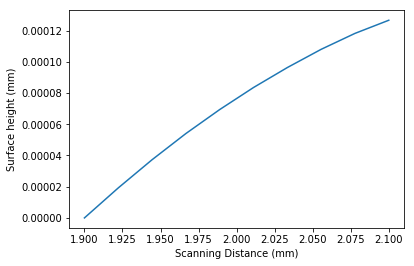

In [82]:
#Plot of surface with angle
import matplotlib.pyplot as plt
import scipy.optimize as opt
profile_plot = np.ndarray.flatten(surface_profile_v2)

plt.ylabel('Surface height (mm)')
plt.xlabel('Scanning Distance (mm)')
plt.plot(x,profile_plot)

def circ(x,x0,y0,r):
    y = -r + y0 + np.sqrt(r**2. - (x-x0)**2.)
    return y.ravel()

popt, pcov = opt.curve_fit(circ,x,profile_plot,p0=(0.,0.,400.))
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

np.savetxt("curved_profile_angle.csv", profile_plot, delimiter=",", fmt = '%s')

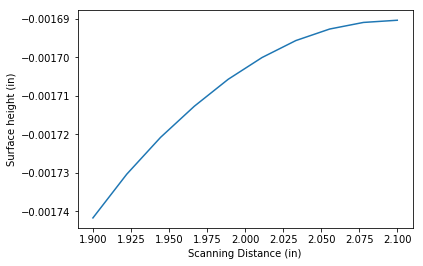

In [76]:
#Plot of surface without angle
angle_slope = dx2d_avg[0,0]
profile_plot = np.ndarray.flatten(surface_profile_v2)
for i in range(np.size(profile_plot)):
    profile_plot[i] = profile_plot[i] - angle_slope*x[i]

import matplotlib.pyplot as plt
plt.ylabel('Surface height (mm)')
plt.xlabel('Scanning Distance (mm)')
plt.plot(x,profile_plot)

np.savetxt("curved_profile_noangle.csv", profile_plot, delimiter=",", fmt = '%s')